In [ ]:
##generating sine wave data for rnn


In [ ]:
import math 
%pylab inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

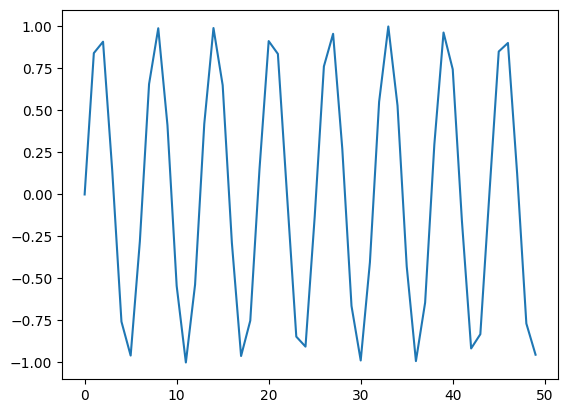

In [3]:
##visualizing the data 
plt.plot(sin_wave[:50])

In [4]:
x = []
y = []

seq_len = 50 
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    x.append(sin_wave[i:i+seq_len])
    y.append(sin_wave[i+seq_len])

x = np.array(x)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y= np.expand_dims(y, axis=1)

print(x.shape, y.shape)


(100, 50, 1) (100, 1)


In [5]:
##val data 
x_val = []
y_val = []

for i in range(num_records - 50 , num_records):
    x_val.append(sin_wave[i:i+seq_len])
    y_val.append(sin_wave[i+seq_len])

x_val = np.array(x_val)
x_val = np.expand_dims(x_val, axis=2)
y_val = np.array(y_val)
y_val= np.expand_dims(y_val, axis=1)

print(x_val.shape, y_val.shape)

(50, 50, 1) (50, 1)


In [6]:
##defining our rnn architecture

learning_rate = 0.0001
nepoch = 25 
T =  50 
hidden_dim = 100
output_dim = 1
bptt_truncate = 5 
min_clip_value = -10
max_clip_value = 10

In [8]:
# defining the weights
#u = weight between input and hidden layer
U = np.random.uniform(0,1,(hidden_dim,T))
#v = hidden and output layer 
W = np.random.uniform(0,1,(hidden_dim,hidden_dim))
#w = weight between hidden layers 
V = np.random.uniform(0,1,(output_dim,hidden_dim))

In [9]:
##defining sigmoid that will be used at hidden layer 
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
##1 - train the model  -- 1.1 - checking loss on training data

for epoch in range(nepoch):
    ##check loss 
    loss = 0.0

    ##do a forward pass to get prediction 
    for i in range(y.shape[0]):
        ##getting input and output values of each record 
        X , Y = x[i], y[i]
        prev_s = np.zeros((hidden_dim,1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = X[t]
            mulu = np.dot(U,new_input)
            mulw = np.dot(W,prev_s)
            add = mulu + mulw
            s = sigmoid(add)
            mulv = np.dot(V,s)
            prev_s = s 

        ##cal loss 
        loss_per_record = (Y-mulv)**2/2
        loss += loss_per_record

    loss = loss/float(Y.shape[0])

In [12]:
##1.2 -- checking loss on validation data

val_loss = 0.0

    ##do a forward pass to get prediction 
for i in range(y_val.shape[0]):
        ##getting input and output values of each record 
    X , Y = x_val[i], y_val[i]
    prev_s = np.zeros((hidden_dim,1))
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = X[t]
        mulu = np.dot(U,new_input)
        mulw = np.dot(W,prev_s)
        add = mulu + mulw
        s = sigmoid(add)
        mulv = np.dot(V,s)
        prev_s = s 
    
    ##cal loss 
        loss_per_record = (Y-mulv)**2/2
        val_loss += loss_per_record

val_loss = val_loss/float(Y.shape[0])

print("epoch" , epoch + 1 , "Loss" , loss , "val_loss" , val_loss)

epoch 25 Loss [[[116013.83307308]
  [116013.83307307]
  [116013.83307294]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307304]
  [116013.83307307]
  [116013.83307308]
  [116013.83307305]
  [116013.83307289]
  [116013.83307308]
  [116013.83307308]
  [116013.83307296]
  [116013.83307308]
  [116013.83307299]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307293]
  [116013.83307308]
  [116013.8330728 ]
  [116013.83307304]
  [116013.83307308]
  [116013.83304531]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307277]
  [116013.83307306]
  [116013.83307307]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116013.83307287]
  [116013.83307308]
  [116013.83307224]
  [116013.8330729 ]
  [116013.83307308]
  [116013.83307305]
  [116013.83307307]
  [116013.83307308]
  [116013.83307308]
  [116013.83307308]
  [116